In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/df_cleaned.csv')

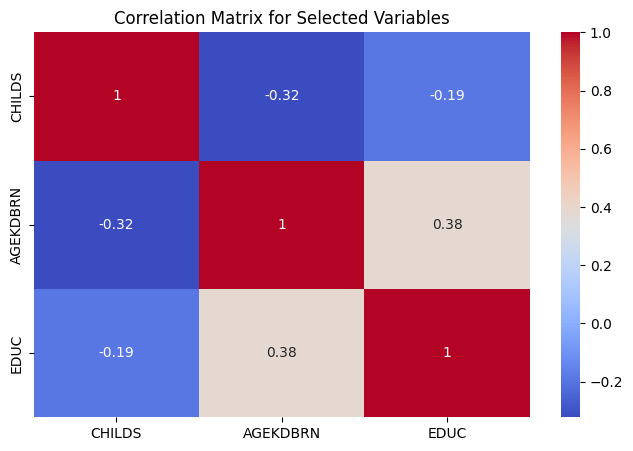

In [3]:
# Selecting a subset of variables for the correlation matrix
selected_vars = ['CHILDS', 'AGEKDBRN', 'EDUC']
correlation_matrix_subset = df[selected_vars].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Variables')
plt.show()

Analysis of Correlation Matrix for 'CHILDS', 'AGEKDBRN', 'EDUC':

Education and age at birth of first child are positively correlated. Number of children and age at birth of first child are negatively correlated. Education status and number of children are negatively correlated.

CHILDS: The number of children
AGEKDBRN: The age at birth of first child
EDUC: The highest year of school completed

Positive numbers indicate a positive correlation: as one variable increases, the other variable tends to also increase. Negative numbers indicate a negative correlation: as one variable increases, the other variable tends to decrease. Values close to 1 or -1 indicate a strong correlation, while values close to 0 indicate weak or no correlation.

In [4]:
# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics: \n", summary_stats)

Summary Statistics: 
             CHILDS     AGEKDBRN         EDUC        HAPPY          GOD  \
count  2319.000000  1658.000000  2318.000000  2318.000000  2301.000000   
mean      1.863303    24.285887    13.745470     1.843399     4.863972   
std       1.674772     5.720111     2.964167     0.645744     1.555415   
min       0.000000    12.000000     0.000000     1.000000     1.000000   
25%       0.000000    20.000000    12.000000     1.000000     4.000000   
50%       2.000000    23.000000    14.000000     2.000000     6.000000   
75%       3.000000    28.000000    16.000000     2.000000     6.000000   
max       8.000000    51.000000    20.000000     3.000000     6.000000   

          INCOME16       FAMGEN          AGE          SEX         RACE  \
count  2148.000000  2320.000000  2315.000000  2320.000000  2320.000000   
mean     17.743017     1.525000    48.907127     1.551293     1.386207   
std       5.925093     0.931586    17.995450     0.497469     0.679890   
min       1.000

In [5]:
df['RELIG'].value_counts()

PROTESTANT                 1134
NONE                        535
CATHOLIC                    488
JEWISH                       39
OTHER                        32
CHRISTIAN                    29
BUDDHISM                     19
MUSLIM/ISLAM                 16
NAN                          11
HINDUISM                      8
ORTHODOX-CHRISTIAN            6
INTER-NONDENOMINATIONAL       1
OTHER EASTERN RELIGIONS       1
NATIVE AMERICAN               1
Name: RELIG, dtype: int64

In [6]:
df.shape

(2320, 18)

##Number of Children and Religion

In [7]:
df['CHILDS'].value_counts()

0.0    650
2.0    620
3.0    380
1.0    345
4.0    165
5.0     73
6.0     47
7.0     23
8.0     16
Name: CHILDS, dtype: int64

In [8]:
child_stats = df.groupby('RELIG')['CHILDS'].describe()
child_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,1.421053,1.677160,0.0,0.00,1.0,2.00,6.0
CATHOLIC,488.0,2.030738,1.700670,0.0,1.00,2.0,3.00,8.0
CHRISTIAN,29.0,1.344828,1.078221,0.0,0.00,1.0,2.00,3.0
HINDUISM,8.0,1.125000,1.726888,0.0,0.00,0.5,1.25,5.0
INTER-NONDENOMINATIONAL,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
JEWISH,39.0,1.820513,1.847784,0.0,0.00,2.0,2.50,8.0
MUSLIM/ISLAM,16.0,1.812500,1.376893,0.0,0.75,2.0,2.25,5.0
NAN,11.0,3.000000,2.323790,0.0,1.50,3.0,3.50,8.0
NATIVE AMERICAN,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0




*   Catholic/Jewish/None/Protestant are categories in which some people have up to 8 children
*   Christian/Hindiusm/Inter-nondenominational/None/Orthodox-Christian/Other on average have the fewest number of children



In [9]:
df['CHILDS'].max()

8.0

Mean:  1.8633031479085813
Median:  2.0
Mode:  0    0.0
Name: CHILDS, dtype: float64


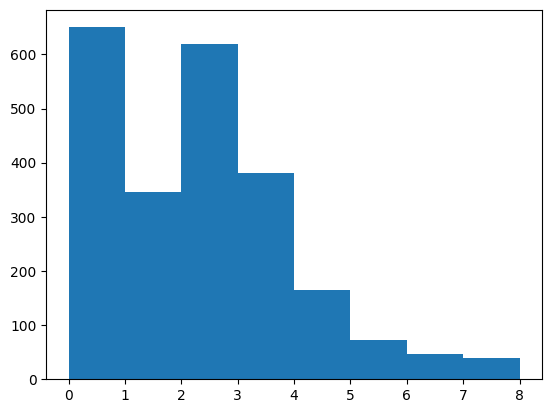

In [11]:
# Statistics: Measure of Central Tendency
df['CHILDS'].hist(bins=8,grid=False)
print('Mean: ', df['CHILDS'].mean() )
print('Median: ', df['CHILDS'].median() )
print('Mode: ', df['CHILDS'].mode() )

Since this is skewed left, the majority of the data points are lower values. Most respondents in our data have either no children or 2 children.

Minimum:  0.0
0th quantile:  0.0
.05 quantile:  0.0
.10 quantile:  0.0
.25 quantile:  0.0
.50 quantile:  2.0
.75 quantile:  3.0
.90 quantile:  4.0
.95 quantile:  5.0
1.00 quantile:  8.0
Sample Maximum: 8.0


<Axes: xlabel='CHILDS'>

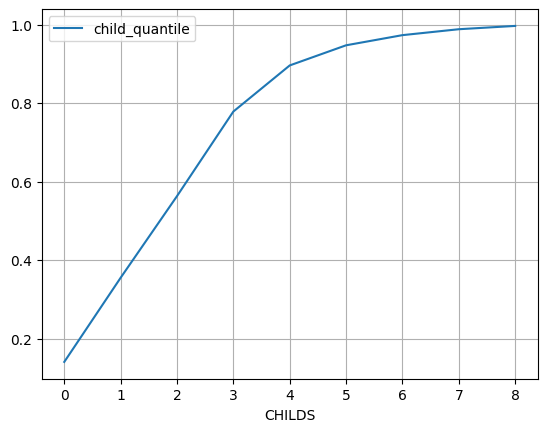

In [12]:
# Statistics: Measure of Rank
# Sample quantiles for the CHILDS variable:
var = 'CHILDS'
print('Minimum: ', df[var].min())
print('0th quantile: ', df[var].quantile(0))
print('.05 quantile: ', df[var].quantile(.05))
print('.10 quantile: ', df[var].quantile(.10))
print('.25 quantile: ', df[var].quantile(.25))
print('.50 quantile: ',df[var].quantile(.50))
print('.75 quantile: ',df[var].quantile(.75))
print('.90 quantile: ',df[var].quantile(.90))
print('.95 quantile: ',df[var].quantile(.95))
print('1.00 quantile: ',df[var].quantile(1))
print('Sample Maximum:', df[var].max())

# A quick Empirical Distribution Function plot:
df['child_quantile'] = df['CHILDS'].rank(method = 'average', pct = True) # Ranks the values
df.sort_values('CHILDS').plot(x = 'CHILDS', y = 'child_quantile', grid = True)

50% of our data set have less than two children, 75% have less than three children.

<ipython-input-13-9bcb092e78af>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='CHILDS', hue='RELIG', common_norm=False, fill=True, palette="tab10")


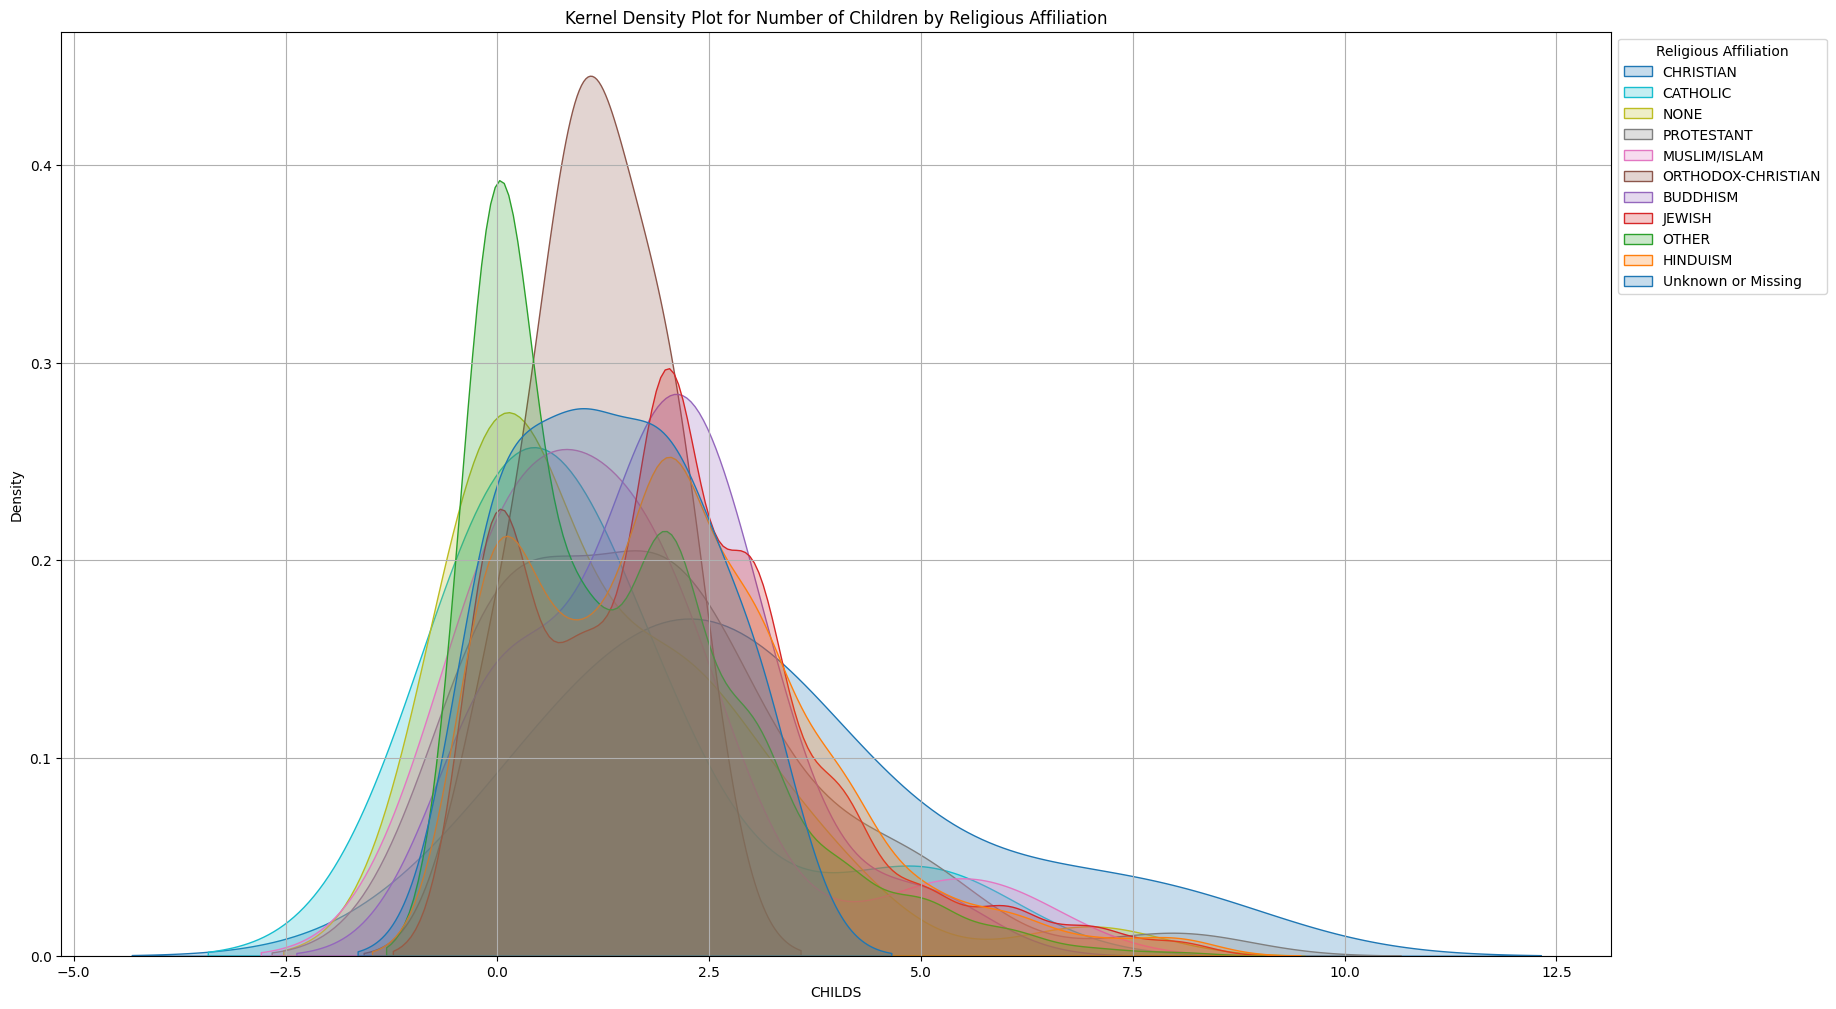

In [13]:
# Initializing plot size
plt.figure(figsize=(20, 12))

# Kernel Density Plot of 'CHILDS' by 'RELIGIOUS AFFILIATION'
sns.kdeplot(data=df, x='CHILDS', hue='RELIG', common_norm=False, fill=True, palette="tab10")

#Move the legend outside of the plot
# Updating "NAN" to "Unknown or Missing"
legend_labels = [t.get_text().replace("NAN", "Unknown or Missing") for t in plt.gca().get_legend().texts]
plt.legend(title='Religious Affiliation', bbox_to_anchor=(1,1), loc='upper left', labels=legend_labels)

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.title('Kernel Density Plot for Number of Children by Religious Affiliation')
plt.show()

<Axes: xlabel='CHILDS', ylabel='Count'>

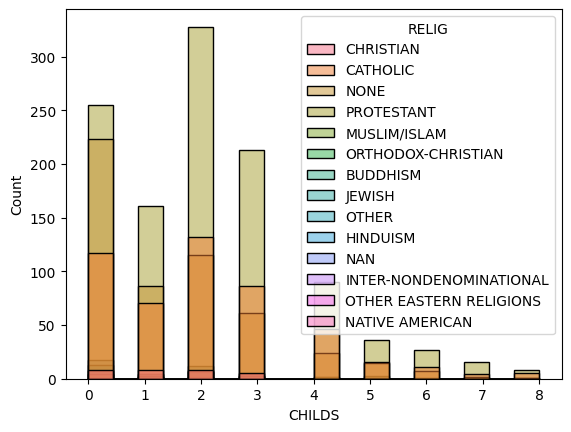

In [14]:
# histogram
var = 'CHILDS'
cat = 'RELIG'
sns.histplot(data=df, x=var, hue = cat)

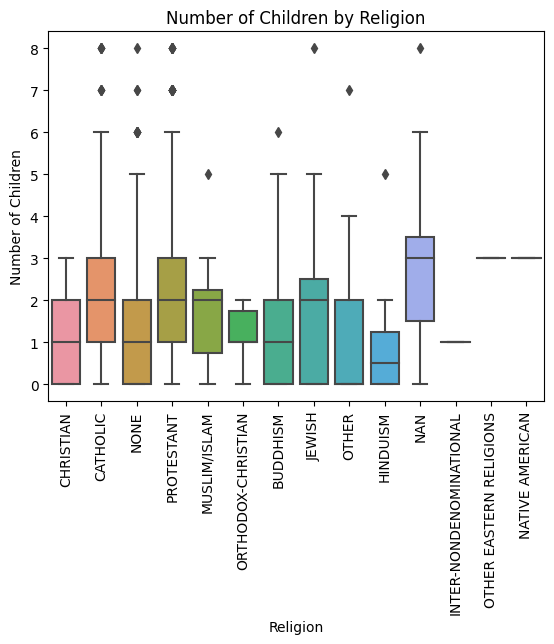

In [15]:
# box plot
sns.boxplot(x='RELIG', y='CHILDS', data=df)
plt.xlabel('Religion')
plt.ylabel('Number of Children')
plt.title('Number of Children by Religion')
plt.xticks(rotation=90)
plt.show()

The median number of children for all religious categories is mostly between 1 or 2 children. There are many outliers across categories (possibly indicating that religious affiliation may not impact the number of children a respondent has).

##Age at Birth of First Child and Religion

In [16]:
df['AGEKDBRN'].value_counts()

21.0    141
19.0    130
20.0    126
25.0    119
24.0    115
22.0    113
23.0    101
18.0     96
28.0     87
30.0     83
17.0     69
27.0     66
26.0     62
29.0     59
32.0     43
33.0     38
31.0     37
16.0     35
35.0     28
15.0     20
34.0     20
37.0     10
38.0     10
40.0     10
36.0      9
14.0      6
39.0      6
41.0      3
42.0      3
47.0      3
43.0      2
13.0      2
51.0      1
45.0      1
50.0      1
46.0      1
12.0      1
44.0      1
Name: AGEKDBRN, dtype: int64

In [17]:
age_birth_stats = df.groupby('RELIG')['AGEKDBRN'].describe()
age_birth_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,12.0,24.083333,5.648143,18.0,20.50,23.5,24.25,37.0
CATHOLIC,370.0,24.751351,5.874275,14.0,20.00,24.0,29.00,47.0
CHRISTIAN,21.0,24.333333,5.498485,15.0,21.00,23.0,29.00,34.0
HINDUISM,4.0,27.250000,2.500000,24.0,26.25,27.5,28.50,30.0
INTER-NONDENOMINATIONAL,1.0,24.000000,NaN,24.0,24.00,24.0,24.00,24.0
JEWISH,26.0,27.576923,5.285248,19.0,25.00,26.0,31.25,39.0
MUSLIM/ISLAM,12.0,23.166667,2.443296,18.0,22.00,23.0,25.00,27.0
NAN,10.0,25.300000,6.037844,17.0,22.00,24.0,31.50,33.0
NATIVE AMERICAN,1.0,23.000000,NaN,23.0,23.00,23.0,23.00,23.0




*   Hinduism/Jewish/Orthodox Christians have the highest mean age at birth of first child.

*   Muslim/Islam/Native American/Other/Other Eastern Religions/Protestants are, on average, the youngest age when their first child is born.


Mean:  24.285886610373943
Median:  23.0
Mode:  0    21.0
Name: AGEKDBRN, dtype: float64


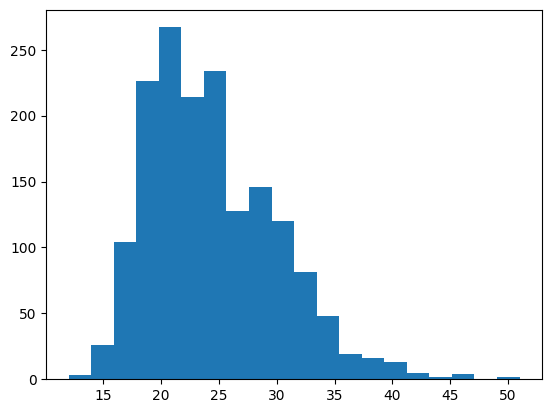

In [18]:
# Statistics: Measure of Central Tendency
df['AGEKDBRN'].hist(bins=20,grid=False)
print('Mean: ', df['AGEKDBRN'].mean() )
print('Median: ', df['AGEKDBRN'].median() )
print('Mode: ', df['AGEKDBRN'].mode() )

In [19]:
df['AGEKDBRN'].max()

51.0

In [20]:
df['AGEKDBRN'].min()

12.0

This is skewed left indicating that more respondents are lower in age when having their first child. The youngest age inputted is 12 which could have been a typing error. There are a few respondents over 45 that could impact the mean.

Minimum:  12.0
0th quantile:  12.0
.05 quantile:  17.0
.10 quantile:  18.0
.25 quantile:  20.0
.50 quantile:  23.0
.75 quantile:  28.0
.90 quantile:  32.0
.95 quantile:  35.0
1.00 quantile:  51.0
Sample Maximum: 51.0


<Axes: xlabel='AGEKDBRN'>

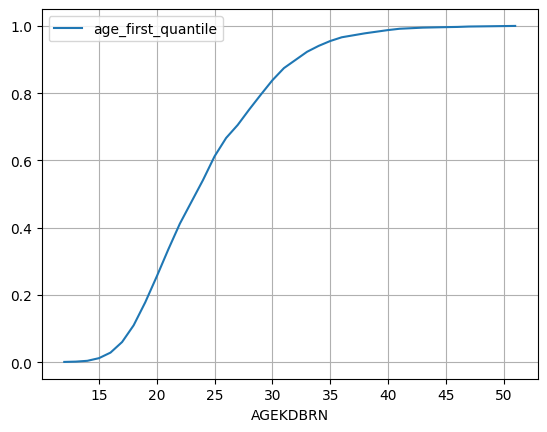

In [21]:
# Statistics: Measure of Rank
# Sample quantiles for the AGEKDBRN variable:
var = 'AGEKDBRN'
print('Minimum: ', df[var].min())
print('0th quantile: ', df[var].quantile(0))
print('.05 quantile: ', df[var].quantile(.05))
print('.10 quantile: ', df[var].quantile(.10))
print('.25 quantile: ', df[var].quantile(.25))
print('.50 quantile: ',df[var].quantile(.50))
print('.75 quantile: ',df[var].quantile(.75))
print('.90 quantile: ',df[var].quantile(.90))
print('.95 quantile: ',df[var].quantile(.95))
print('1.00 quantile: ',df[var].quantile(1))
print('Sample Maximum:', df[var].max())

# A quick Empirical Distribution Function plot:
df['age_first_quantile'] = df['AGEKDBRN'].rank(method = 'average', pct = True) # Ranks the values
df.sort_values('AGEKDBRN').plot(x = 'AGEKDBRN', y = 'age_first_quantile', grid = True)

50% of our dataset have their first born child by 23 years old while 90% have their first born child by 32.

<ipython-input-22-2c9f7bc0ed39>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='AGEKDBRN', hue='RELIG', common_norm=False, fill=True, palette="tab10")


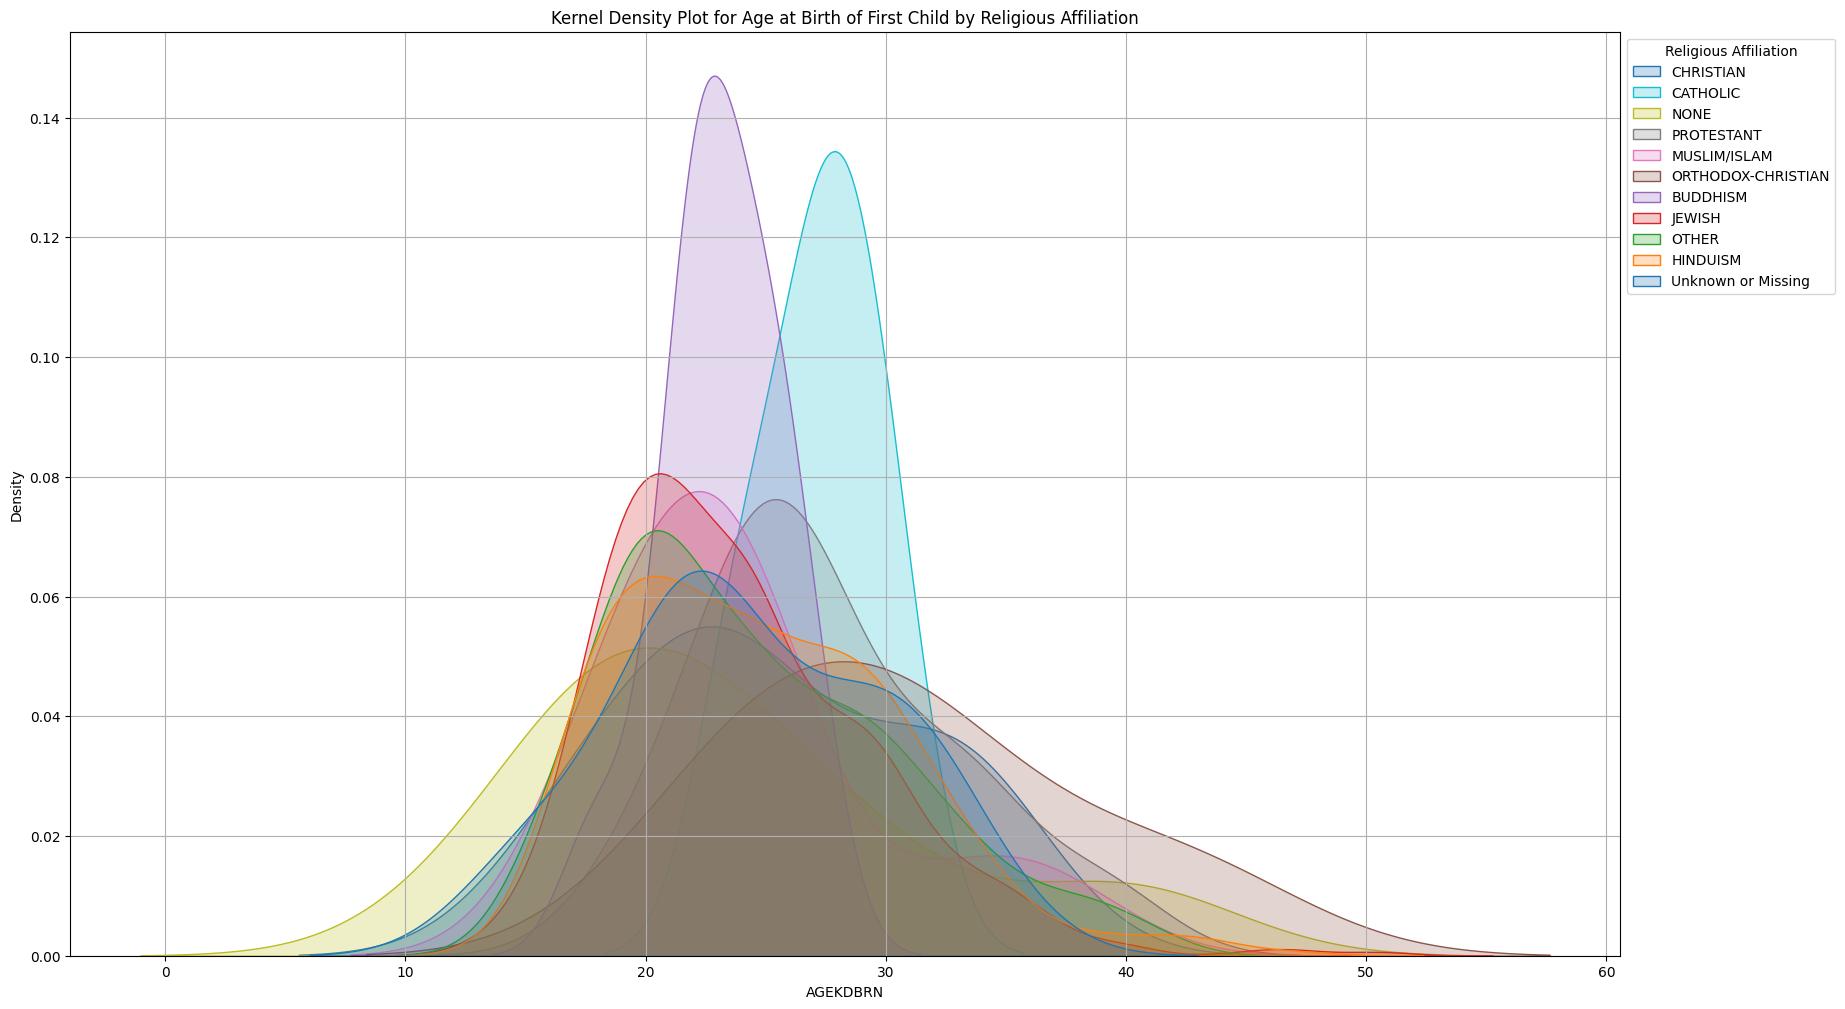

In [22]:
# Initializing plot size
plt.figure(figsize=(20, 12))

# Kernel Density Plot of 'AGEKDBRN' by 'RELIGIOUS AFFILIATION'
sns.kdeplot(data=df, x='AGEKDBRN', hue='RELIG', common_norm=False, fill=True, palette="tab10")

#Move the legend outside of the plot
# Updating "NAN" to "Unknown or Missing"
legend_labels = [t.get_text().replace("NAN", "Unknown or Missing") for t in plt.gca().get_legend().texts]
plt.legend(title='Religious Affiliation', bbox_to_anchor=(1,1), loc='upper left', labels=legend_labels)

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.title('Kernel Density Plot for Age at Birth of First Child by Religious Affiliation')
plt.show()


<Axes: xlabel='AGEKDBRN', ylabel='Count'>

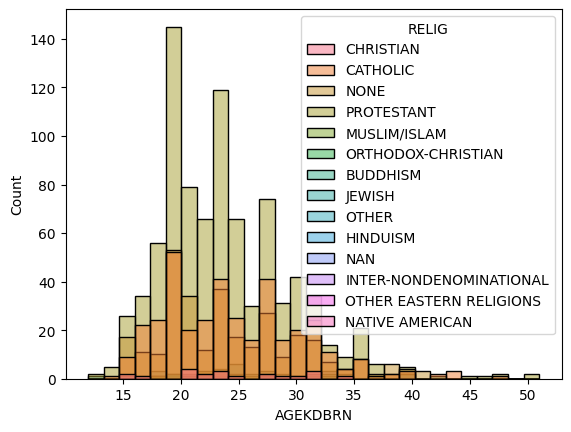

In [23]:
# histogram
var = 'AGEKDBRN'
cat = 'RELIG'
sns.histplot(data=df, x=var, hue = cat)

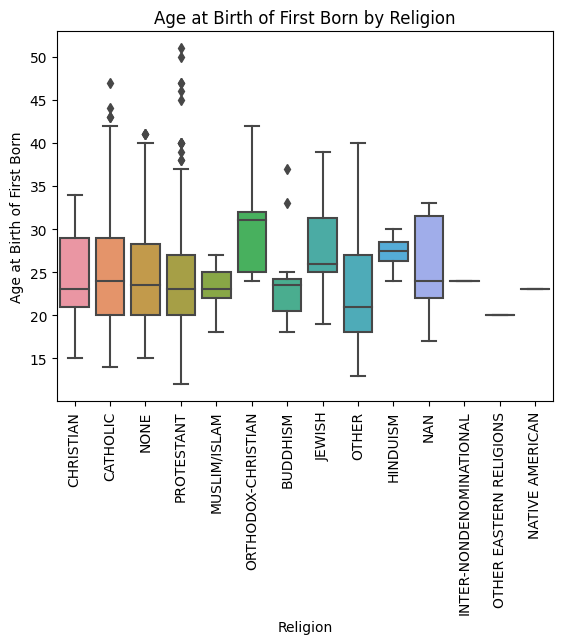

In [24]:
# box plot
sns.boxplot(x='RELIG', y='AGEKDBRN', data=df)
plt.xlabel('Religion')
plt.ylabel('Age at Birth of First Born')
plt.title('Age at Birth of First Born by Religion')
plt.xticks(rotation=90)
plt.show()

Many median ages are below 25. The median age of having the first born child for Orthodox-Christian/Jewish/Hinduism is above 25 with Hinduism having the smallest distribution of ages between 4 respondents. Orthodox-Christians have the highest median age of having their first child.

##Highest Level of Education and Religion

In [25]:
df['EDUC'].value_counts()

12.0    645
16.0    426
14.0    312
13.0    182
15.0    127
18.0    119
17.0     96
11.0     94
20.0     70
10.0     65
9.0      50
19.0     45
8.0      33
6.0      19
3.0      10
7.0       8
4.0       5
2.0       4
0.0       4
1.0       2
5.0       2
Name: EDUC, dtype: int64

In [26]:
educ_stats = df.groupby('RELIG')['EDUC'].describe()
educ_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,14.105263,2.183136,11.0,12.50,14.0,15.50,20.0
CATHOLIC,487.0,13.285421,3.317656,0.0,12.00,13.0,16.00,20.0
CHRISTIAN,29.0,14.310345,2.331515,9.0,12.00,14.0,16.00,18.0
HINDUISM,8.0,16.750000,3.494894,11.0,15.00,18.0,19.25,20.0
INTER-NONDENOMINATIONAL,1.0,14.000000,NaN,14.0,14.00,14.0,14.00,14.0
JEWISH,39.0,16.358974,2.719202,12.0,14.00,16.0,18.50,20.0
MUSLIM/ISLAM,16.0,14.562500,2.502499,12.0,12.00,15.0,16.00,20.0
NAN,11.0,13.363636,2.838053,8.0,12.00,14.0,16.00,16.0
NATIVE AMERICAN,1.0,12.000000,NaN,12.0,12.00,12.0,12.00,12.0




*   Hinduism and Jewish have the highest mean level of education, although there are few respondents in these categories.
*   Native American/Other Eastern Religions have a mean from completing high school (12) or lower. Each only had one respondent so not indicative of the population.
*   Overall, most religions have at least some college education.



In [27]:
df['EDUC'].max()

20.0

Mean:  13.745470232959448
Median:  14.0
Mode:  0    12.0
Name: EDUC, dtype: float64


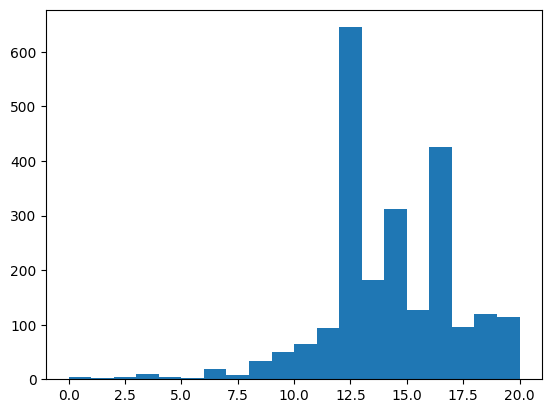

In [28]:
# Statistics: Measure of Central Tendency
df['EDUC'].hist(bins=20,grid=False)
print('Mean: ', df['EDUC'].mean() )
print('Median: ', df['EDUC'].median() )
print('Mode: ', df['EDUC'].mode() )

This data is skewed right which means that the majority of the data points are concentrated on the left and are higher. The very low levels of education are possibly lowering the mean.

Minimum:  0.0
0th quantile:  0.0
.05 quantile:  9.0
.10 quantile:  11.0
.25 quantile:  12.0
.50 quantile:  14.0
.75 quantile:  16.0
.90 quantile:  18.0
.95 quantile:  18.0
1.00 quantile:  20.0
Sample Maximum: 20.0


<Axes: xlabel='EDUC'>

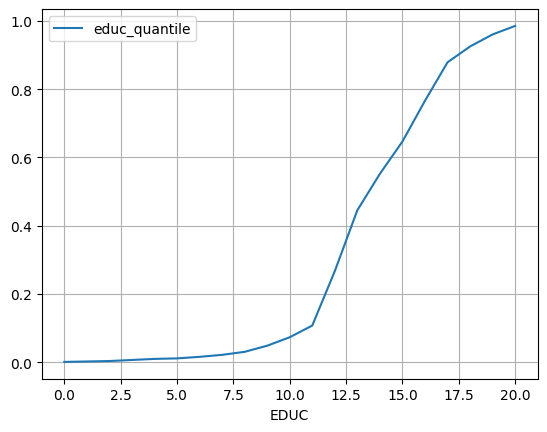

In [29]:
# Statistics: Measure of Rank
# Sample quantiles for the EDUC variable:
var = 'EDUC'
print('Minimum: ', df[var].min())
print('0th quantile: ', df[var].quantile(0))
print('.05 quantile: ', df[var].quantile(.05))
print('.10 quantile: ', df[var].quantile(.10))
print('.25 quantile: ', df[var].quantile(.25))
print('.50 quantile: ',df[var].quantile(.50))
print('.75 quantile: ',df[var].quantile(.75))
print('.90 quantile: ',df[var].quantile(.90))
print('.95 quantile: ',df[var].quantile(.95))
print('1.00 quantile: ',df[var].quantile(1))
print('Sample Maximum:', df[var].max())

# A quick Empirical Distribution Function plot:
df['educ_quantile'] = df['EDUC'].rank(method = 'average', pct = True) # Ranks the values
df.sort_values('EDUC').plot(x = 'EDUC', y = 'educ_quantile', grid = True)

50% of our dataset have 14 years of education while only 25% complete college or beyond.

<ipython-input-30-07125e6de157>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='EDUC', hue='RELIG', common_norm=False, fill=True, palette="tab10")


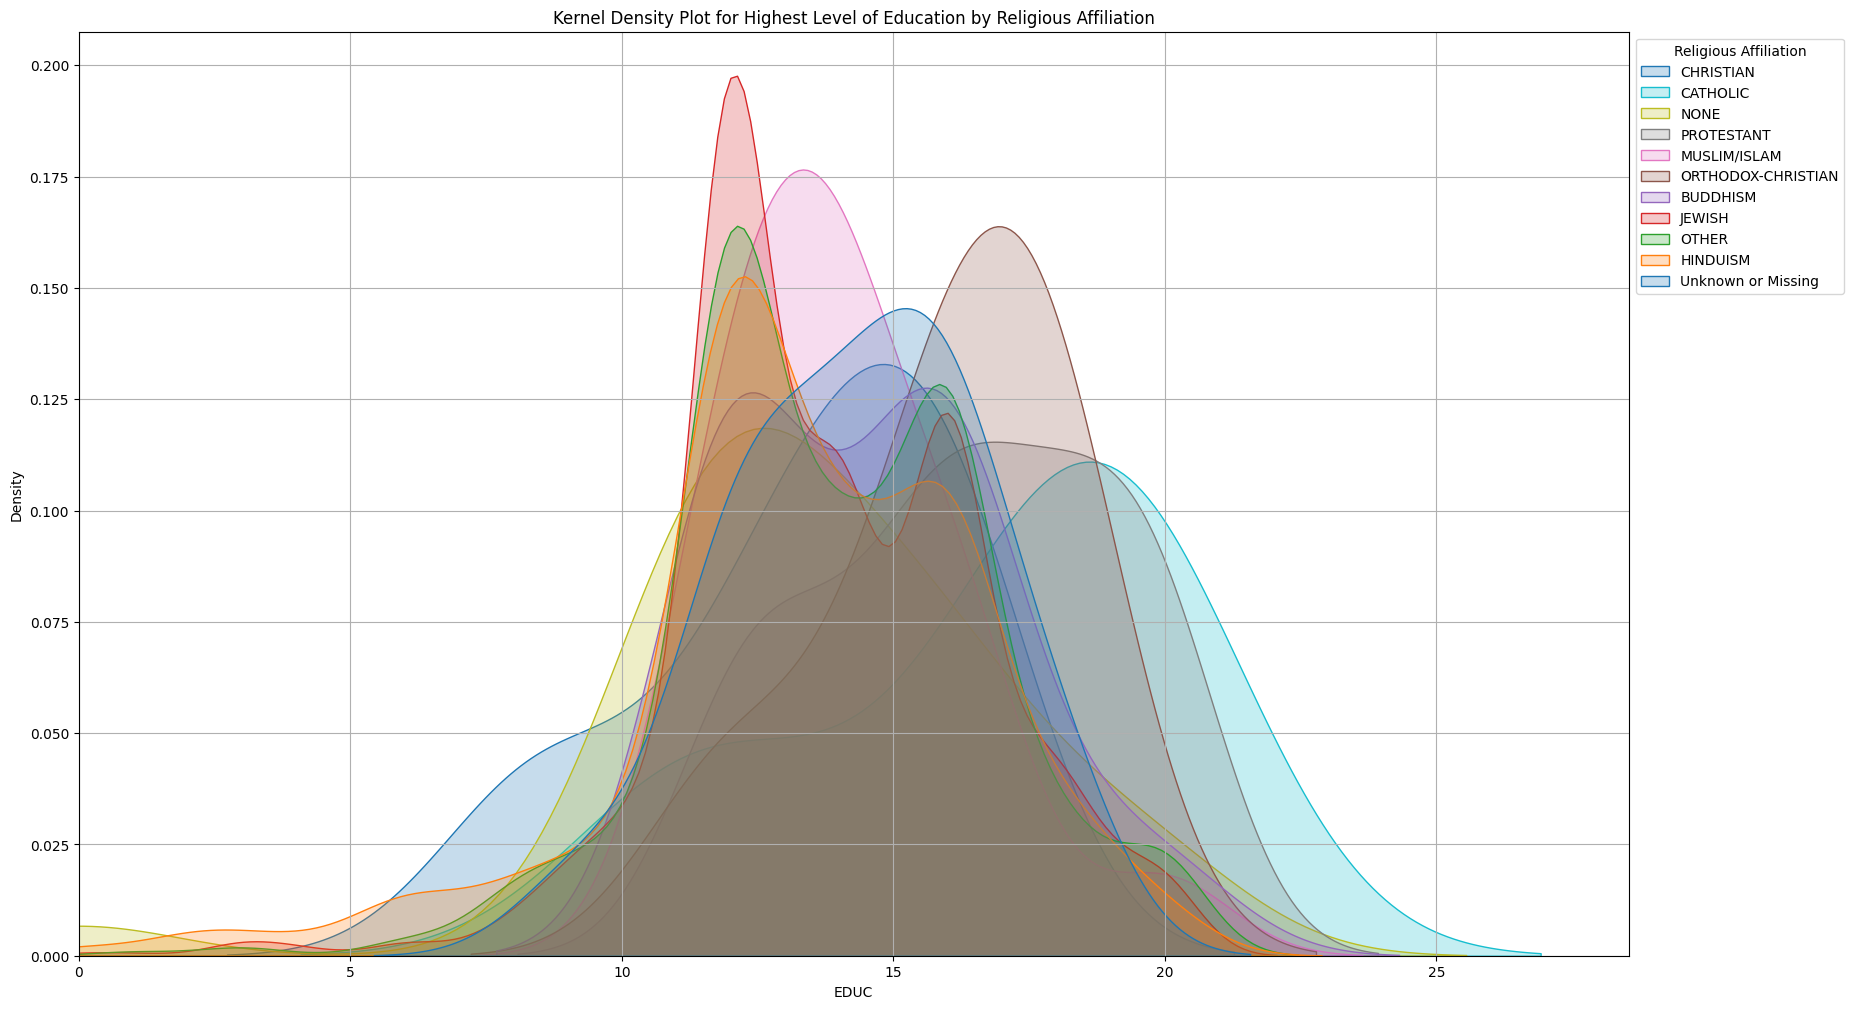

In [30]:
# Initializing plot size
plt.figure(figsize=(20, 12))

# Kernel Density Plot of 'EDUC' by 'RELIGIOUS AFFILIATION'
sns.kdeplot(data=df, x='EDUC', hue='RELIG', common_norm=False, fill=True, palette="tab10")

# Limit x-axis to non-negative range
plt.xlim(left=0)

#Move the legend outside of the plot
# Updating "NAN" to "Unknown or Missing"
legend_labels = [t.get_text().replace("NAN", "Unknown or Missing") for t in plt.gca().get_legend().texts]
plt.legend(title='Religious Affiliation', bbox_to_anchor=(1,1), loc='upper left', labels=legend_labels)

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.title('Kernel Density Plot for Highest Level of Education by Religious Affiliation')
plt.show()


<Axes: xlabel='EDUC', ylabel='Count'>

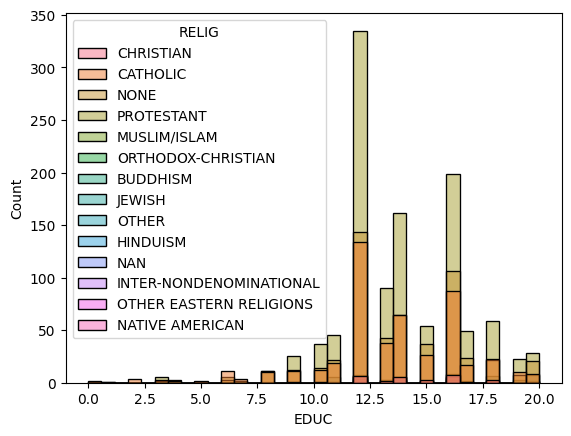

In [31]:
# histogram
var = 'EDUC'
cat = 'RELIG'
sns.histplot(data=df, x=var, hue = cat)

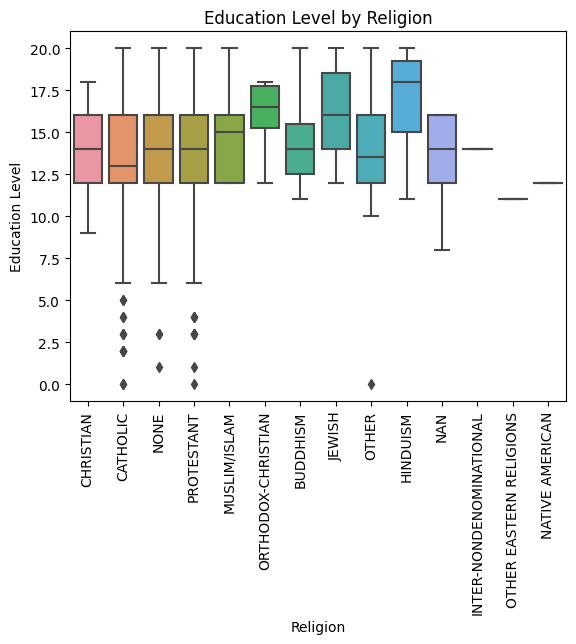

In [32]:
# box plot
sns.boxplot(x='RELIG', y='EDUC', data=df)
plt.xlabel('Religion')
plt.ylabel('Education Level')
plt.title('Education Level by Religion')
plt.xticks(rotation=90)
plt.show()



*   Hinduism has the highest median levels of education.
*   Christian/None/Protestant/Buddhism/Other/NAN all have 14 years of education

*   There are several outliers for Catholic/None/Protestant with very few years of education and have the largest range of levels of education

##Other visualizations

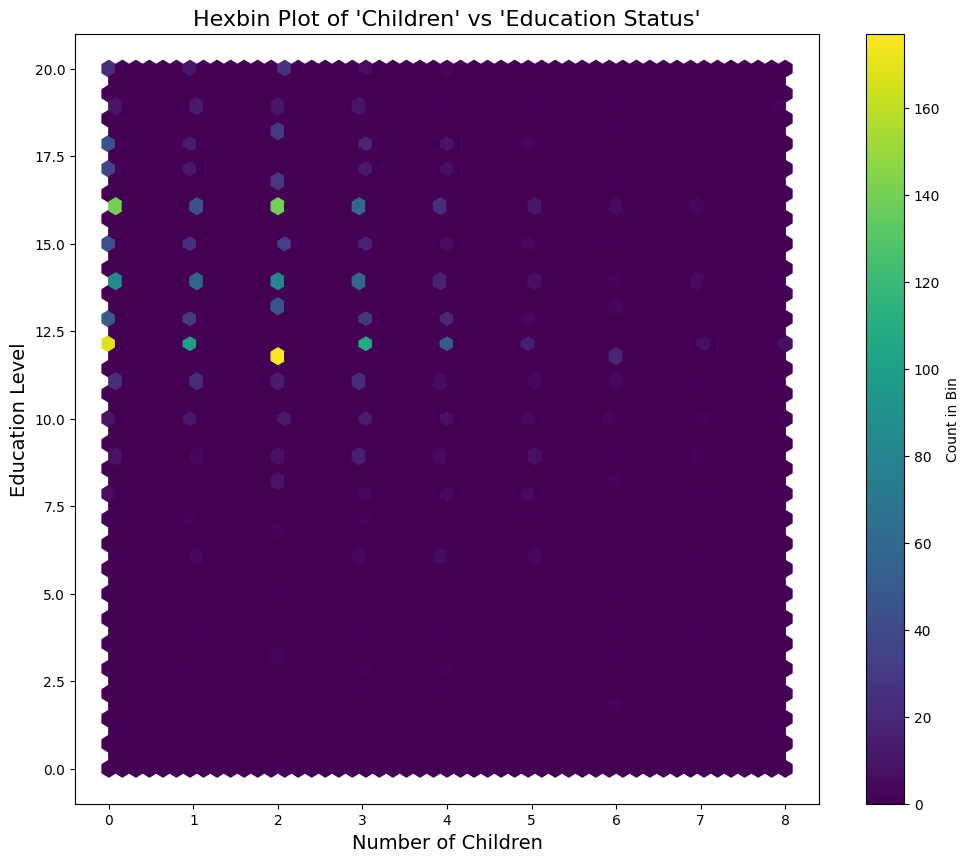

In [33]:
# Create the hexbin plot for CHILDS and EDUC
plt.figure(figsize=(12, 10))
plt.hexbin(x=df['CHILDS'], y=df['EDUC'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count in Bin')

# Add titles and labels
plt.title("Hexbin Plot of 'Children' vs 'Education Status'", fontsize=16)
plt.xlabel("Number of Children", fontsize=14)
plt.ylabel("Education Level", fontsize=14)

# Show the plot
plt.show()

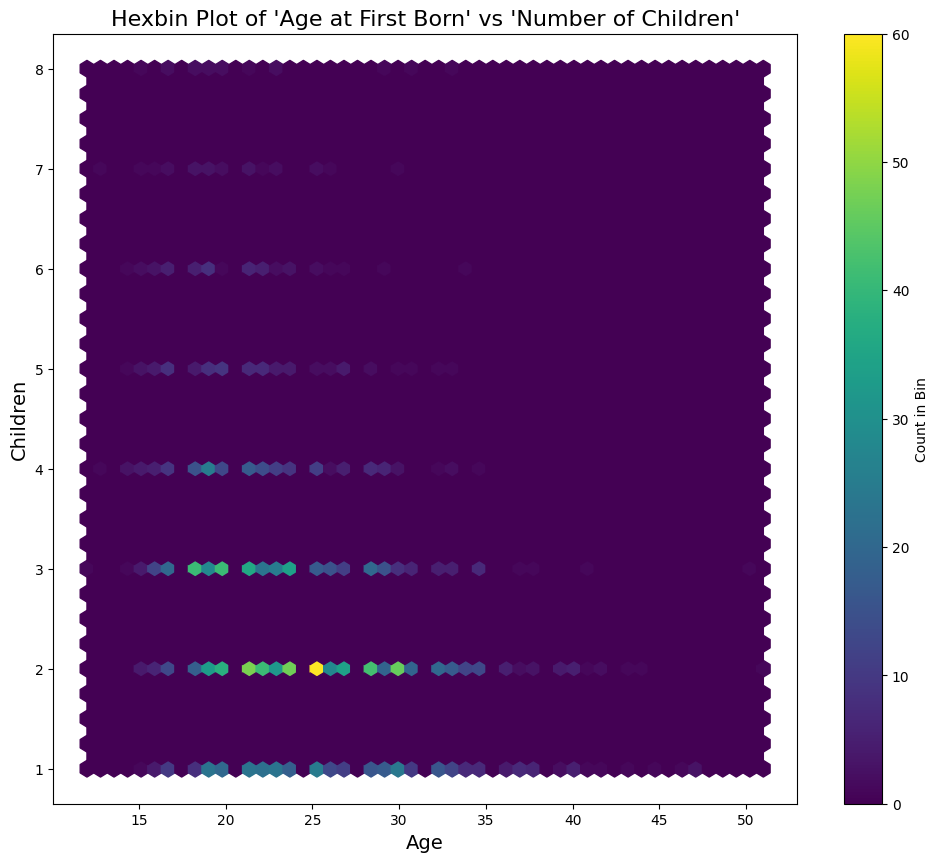

In [34]:
# Create the hexbin plot for AGEKDBRN and CHILDS
plt.figure(figsize=(12, 10))
plt.hexbin(x=df['AGEKDBRN'], y=df['CHILDS'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count in Bin')

# Add titles and labels
plt.title("Hexbin Plot of 'Age at First Born' vs 'Number of Children'", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Children", fontsize=14)

# Show the plot
plt.show()

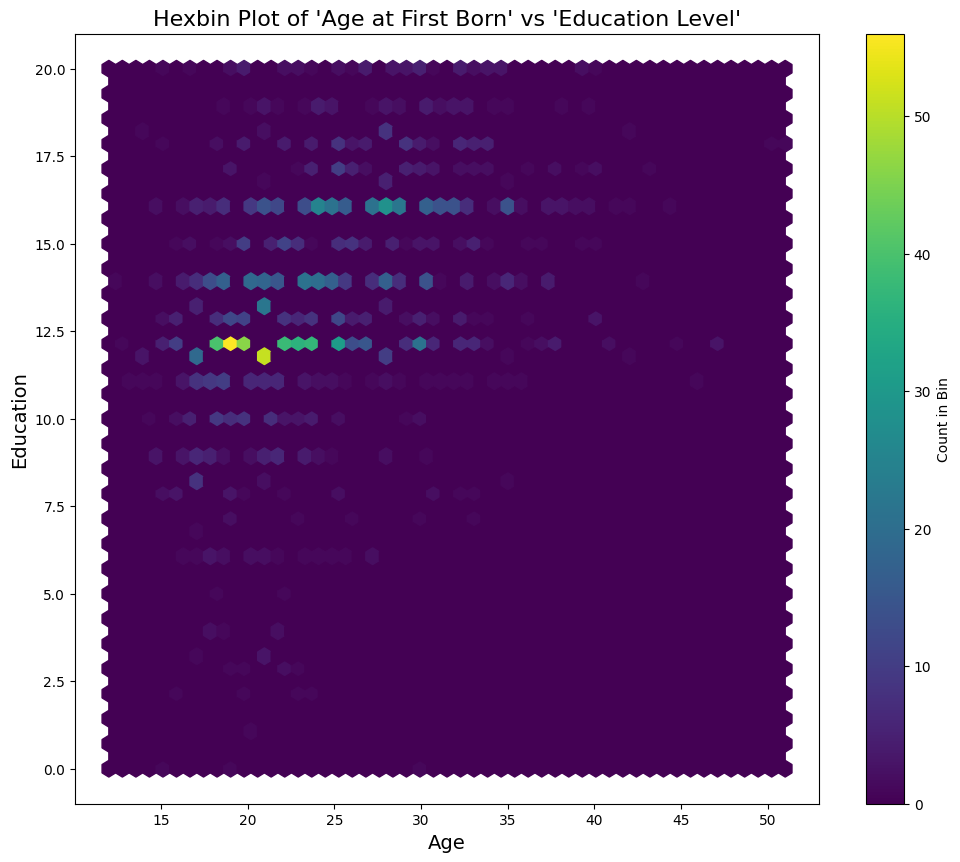

In [35]:
# Create the hexbin plot for AGEKDBRN and EDUC
plt.figure(figsize=(12, 10))
plt.hexbin(x=df['AGEKDBRN'], y=df['EDUC'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count in Bin')

# Add titles and labels
plt.title("Hexbin Plot of 'Age at First Born' vs 'Education Level'", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Education", fontsize=14)

# Show the plot
plt.show()